# Visualise the activation of convnet filters

In this notebook we will plot all the filters of all the layers in a convolutional network, and try to get an impression of what they do. 

The notebook is based on [this one](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter09_part03_interpreting-what-convnets-learn.ipynb), written by textbook author. If you want to visualise a slightly more complicated neural network, please run through this one as well. Here, in our simpler case, we look at a MNIST digit classifier, like the one from notebook 1.

### Setup

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2026-01-23 15:08:50.989758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-23 15:08:51.010943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-23 15:08:51.017783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-23 15:08:51.034251: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load data

We load the MNIST data, as before:

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define the model

This time, let us use the functional model API to define the network. The structure is identical to notebook 1, but all layers are Keras functions, being applied to the output from the layer before.

In [3]:
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

# Define the Model instance
convnet = keras.Model(inputs=inputs, outputs=outputs)

# Print it
convnet.summary()

2026-01-23 15:08:54.920316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22233 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:84:00.0, compute capability: 8.6
2026-01-23 15:08:54.921140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9781 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:04:00.0, compute capability: 7.5


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,146 (74.79 KB)

 Trainable params: 19,146 (74.79 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

### <span style="color: red;">Exercise:<span>

Compile and train the model.

In [4]:
batch_size = 128 
epochs = 10 

#convnet.compile(...)

#convnet.fit(...)


### Select an example image

Pick the fourth image in `X_test`, and plot it.

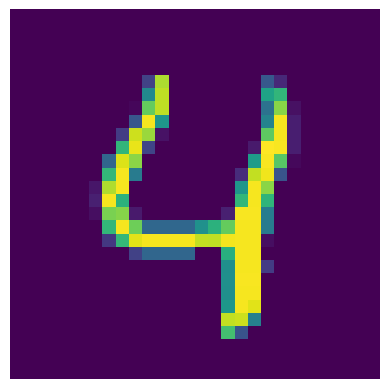

In [5]:
img = X_test[4]

plt.axis("off")
plt.imshow(img)
plt.show()

**Note**: These are grayscale (black-and-white) images, but the default colormap adds some color to them, to make different values easier to perceive. In case you want to plot them in their true grayscale glory, use

```
plt.imshow(img, cmap='gray')
```

in the code above (and below).

### Predict the number

To run the model on our example image, we have to add the batch axis, so that its shape is (1, 28, 28, 1).

The `predict` function outputs the predictions for each class 0-9.


In [6]:
img_tensor = tf.expand_dims(img, axis=0)

preds = convnet.predict(img_tensor)[0]

for i in range(len(preds)):
    print(f'{i}: score = {preds[i]:.4f}')

print()
print(f'Predicted number: {tf.argmax(preds)}')

I0000 00:00:1769177335.620814   32192 service.cc:146] XLA service 0x7fe4140066b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769177335.620862   32192 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1769177335.620865   32192 service.cc:154]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2026-01-23 15:08:55.628788: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-23 15:08:55.652797: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90701


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
0: score = 0.0901
1: score = 0.1006
2: score = 0.0940
3: score = 0.0900
4: score = 0.0883
5: score = 0.1074
6: score = 0.1219
7: score = 0.1035
8: score = 0.0941
9: score = 0.1102

Predicted number: 6


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
I0000 00:00:1769177336.028795   32192 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### Get the layer activations

Now, we'll create a new `Model` instance that returns the activations of the convolution (`Conv2D`) and max-pooling (`MaxPooling2D`) layers.

In [7]:
layer_outputs = []
layer_names = []
for layer in convnet.layers:
    print(layer)
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=convnet.input, outputs=layer_outputs)

<InputLayer name=input_layer, built=True>
<Conv2D name=conv2d, built=True>
<MaxPooling2D name=max_pooling2d, built=True>
<Conv2D name=conv2d_1, built=True>
<MaxPooling2D name=max_pooling2d_1, built=True>
<Conv2D name=conv2d_2, built=True>
<MaxPooling2D name=max_pooling2d_2, built=True>
<Flatten name=flatten, built=True>
<Dropout name=dropout, built=True>
<Dense name=dense, built=True>


Run it to get the activations!

In [8]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


Plot the activations of the fifth filter of the first layer:

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


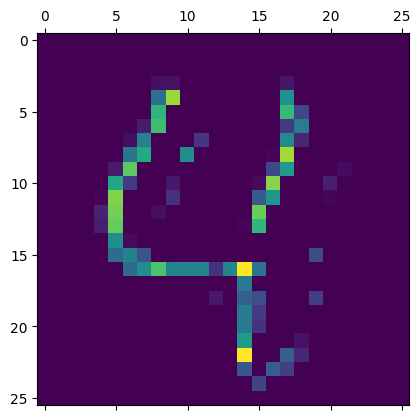

In [10]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5])

### Plot all activations

After running the cell below, right-click the output and select "Disable Scrolling for Outputs", in order to show all plots below each other.

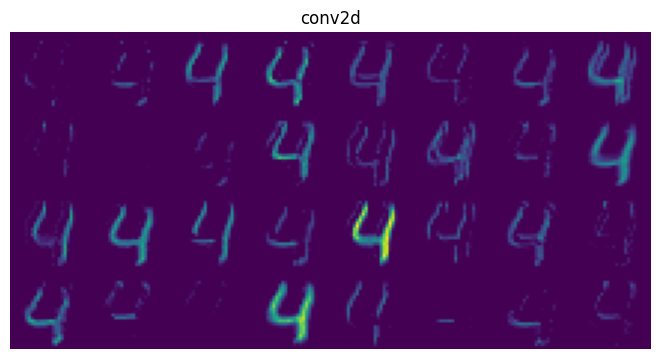

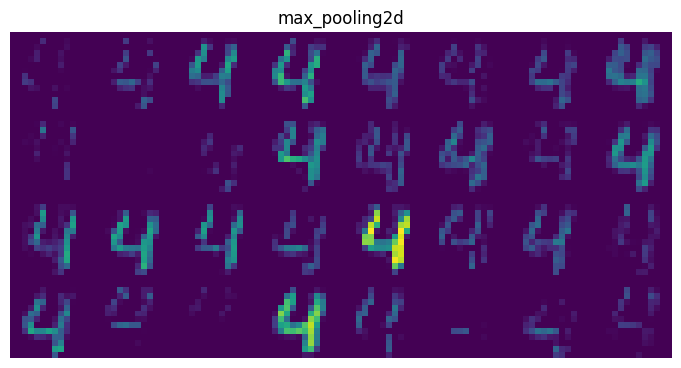

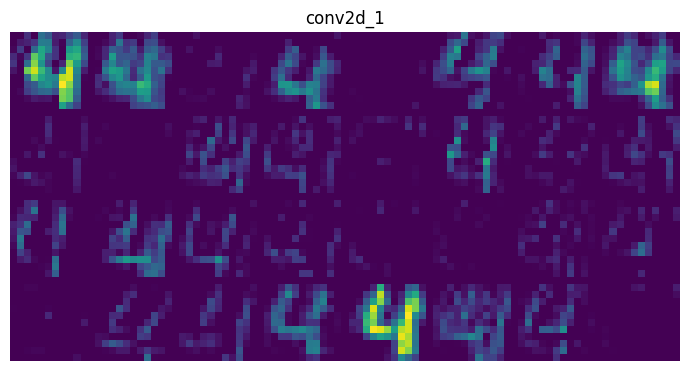

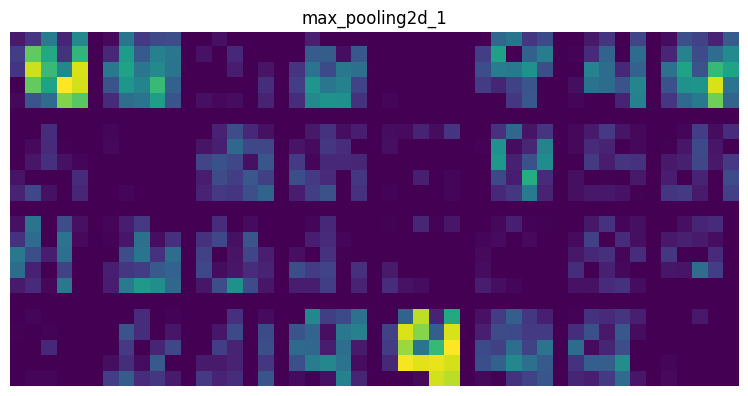

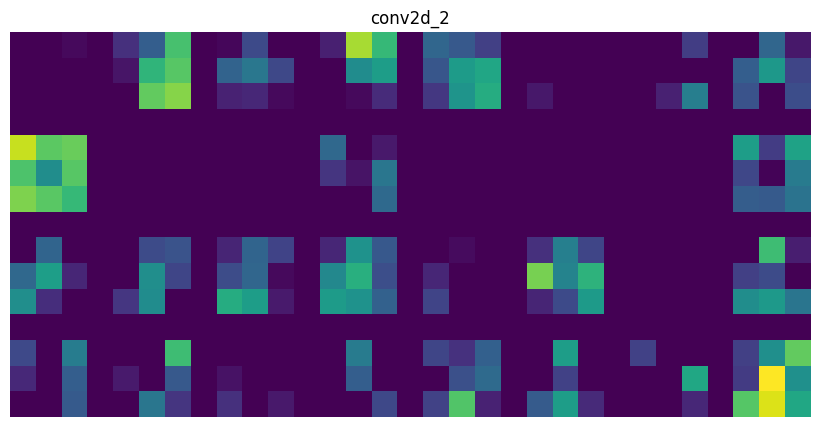

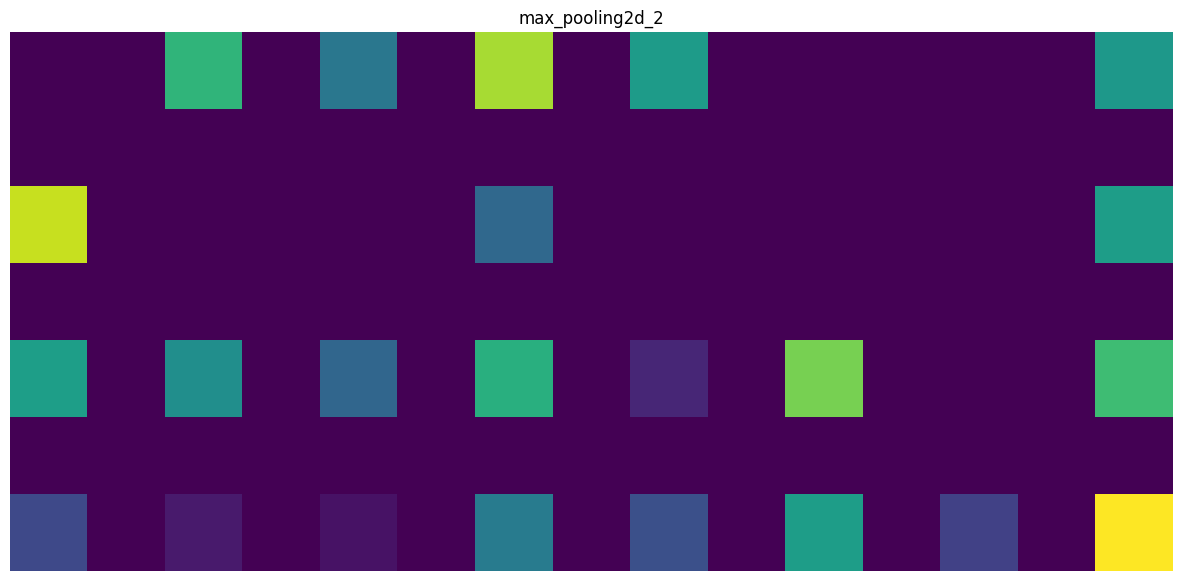

In [11]:
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

### <span style="color: red;">Exercise:<span>

Try to make sense of the plots, by changing the input image to different ones:

- What do the `conv2d_*` layers do?
- What do the `max_pooling_*` layers do?
- Does the information in the successive layers become more clear or less clear?
- Can you relate the pixels in the final layer to the different number predictions?
